In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
import scipy
from util import load_sample,load_acertos, provas, params_inep, item_info_inep

%load_ext autoreload
%autoreload 2

sns.set_context('paper',font_scale=1.2,rc={"figure.figsize": (10,6)})
sns.set_style('darkgrid')

# Calcular as notas pela TRI
No notebook PrepareData tranformamos os microdados e as padrões de resposta dos candidatos num formato conveniente de 0 e 1 para os acertos. Vamos carregar os padrões com a função `load_acertos`. As últimas três colunas são o número de acertos, o número do caderno que o candidato usou e a nota que o INEP deu ao candidato. 

In [37]:
ano = 2024
area = 'LC'
padr = load_acertos(ano,area,perc=2)
display(padr)

,111888,140760,140710,140789,141730,118194,87876,61929,97312,118157,...,150678,150675,141218,141206,150425,150680,lingua,acertos,caderno,nota_inep
candidato,,,,,,,,,,,,,,,,,,,,,
1799377,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,...,0,1,1,1,1,0,0,35,1397,633.9
3812986,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,0.0,...,1,1,1,0,0,0,0,13,1397,453.1
2592284,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,1.0,...,1,1,0,1,1,1,0,26,1397,560.1
3347182,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,...,0,1,0,1,0,0,0,17,1397,482.5
2811751,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,18,1397,495.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305346,1.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,1,14,1398,465.9
469363,1.0,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,1,1,1,1,0,1,1,34,1398,611.0
769555,1.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,...,0,1,1,1,1,1,1,26,1398,547.0


Se quiser usar somente o padrão de resposta, tire estas últimas três colunas com o seguinte idioma (truque). Leia assim: iloc escolhe todas as linhas, e todas as colunas até a "última -3". 

In [52]:
padr.iloc[:,:-3]

,111888,140760,140710,140789,141730,118194,87876,61929,97312,118157,...,150766,150621,140894,150678,150675,141218,141206,150425,150680,lingua
candidato,,,,,,,,,,,,,,,,,,,,,
1799377,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,...,1,1,1,0,1,1,1,1,0,0
3812986,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,0.0,...,0,0,0,1,1,1,0,0,0,0
2592284,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,1.0,...,1,1,0,1,1,0,1,1,1,0
3347182,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,...,1,1,1,0,1,0,1,0,0,0
2811751,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305346,1.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,1,0,0,1
469363,1.0,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,1,1,1,1,1,1,1,0,1,1
769555,1.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,1,1,1,1,1,1


Note que são 43 colunas, indicando que há 2 itens descartados pelo inep. Vamos conferir

In [39]:
params = params_inep(ano,area,dropna=False)
params[params['a_inep'].isna()]

,a_inep,b_inep,c_inep,u
CO_ITEM,,,,


Agora vamos transformar os padrões de resposta em nota, usando a Teoria de Resposta ao Item. 

A TRI propoe um modelo probabilístico para a geração de padrões de respostas como estes mostrado acima. O chamado modelo de três parâmetros logístico para a probabilidade de acertar um determinado item é:

$$ P(x=1|\theta) = c+ \frac{1-c}{1+e^{a(b-\theta )}} $$

onde os parâmetros $a,b$ e $c$ dependem da cada item e $P(x=1|\theta)$ é a probabilidade de acertar o item, dado uma habilidade $\theta$. Veja alguns parâmetros dos itens, segundo as calibrações do INEP:

In [40]:
ano = 2024
area = 'LC'
params = params_inep(ano, area).sample(5) # só 5 dos 45 itens, para ilustrar
params

,a_inep,b_inep,c_inep,u
CO_ITEM,,,,
118254,2.12690,-0.37854,0.00587,1
118194,4.67112,0.81082,0.33341,1
118217,2.59075,0.81709,0.21069,1
119743,0.49366,2.05523,0.09974,1
150676,1.57870,-0.00945,0.05369,1


In [41]:
def PL3(theta,a=1,b=0,c=0):
    return c + (1-c)*1/(1+np.exp(a*(b-theta)))

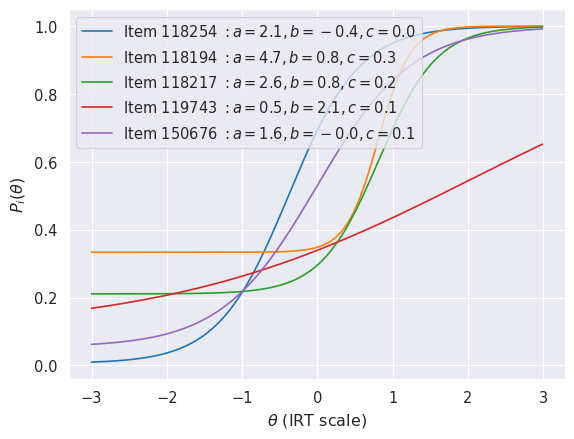

In [42]:
theta = np.arange(-3,3,0.01)

for item,param in params.iterrows():
    a,b,c = param['a_inep'],param['b_inep'],param['c_inep']
    ax = sns.lineplot(x=theta,y=PL3(theta,a,b,c), label=f"Item {item} $: a={a:.1f}, b={b:.1f}, c={c:.1f}$")
    ax.set_xlabel(r"$ \theta$ (IRT scale)")
    ax.set_ylabel(r"$P_i(\theta)$")

A TRI assume que um padrão de resposta é dado por uma sequência de "ensaios de Bernoulli" independentes (a probabilidade de acertar um item não deve depender, portanto, dos itens e respostas anteriores ou posteriores). Se isso for verdade, então a probabilidade de um determinado padrão de respostas $\{x_1, x_2 \ldots x_{45}\} = \{x_i\} = \vec{x}$, dado uma certa habilidade, é produto de 45 probabilidades $P_i(x_i=1)$ e $1-P_i(x_i=1)$:

$$ \text{prob}(\vec{x}|\theta)= \prod_{i=1}^{45} P_i(\theta)^{x_i} (1-P_i(\theta))^{1-x_{i}} $$ 

(Note que o $x_i = 0$ ou $1$ no expoente escolhe $P$ ou $1-P$). 

Vamos escrever funções que pegam os parâmetros TRI de uma ano e area, juntando com 1 ou mais padrões de resposta.

In [71]:
def padrparams(ano,area,n=None,nota_inep = False,orderby=None,acertos=None):
    'retorna padrão de resposta + parâmetros dos itens, com itens na linhas e candidatos nas colunas'
    params = params_inep(ano, area,dropna=True)
    if n:
        padr = load_acertos(ano,area,n,acertos=acertos)
    else:
        padr = load_acertos(ano,area,1,acertos=acertos)
    pp = params.join(padr.iloc[:,:-3].T,validate='1:1')
    pp = pp.dropna()
    if orderby:
        pp = pp.sort_values(orderby)
    if nota_inep:
        return pp,padr.iloc[:,-3:]
    else:
        return pp

def padr_prob(theta,padrparams,posterior = False):
    'Probabilidade de padrões de resposta, em função da habilidade theta'
    lh = np.ones(len(theta))
    for item,value in padrparams.iterrows():
        a,b,c = value['a_inep'],value['b_inep'],value['c_inep']
        acertou = value.iloc[-1] # asssumir que o padrão de respsosta é a última coluna
        if acertou:
            lh = lh*PL3(theta,a,b,c)
        else:
            lh = lh*(1-PL3(theta,a,b,c))
    if posterior:
        from scipy.stats import norm
        posterior = lh*norm.pdf(theta)
        return lh, posterior
    else:
        return lh

In [74]:
pp,nota_inep = padrparams(2024,'LC',nota_inep=True)
display(nota_inep)
pp

,acertos,caderno,nota_inep
candidato,,,
199480,22,1395,517.3


,a_inep,b_inep,c_inep,u,199480
CO_ITEM,,,,,
141460,2.39673,0.03767,0.26467,1,0.0
150747,1.85835,-0.12011,0.08169,1,1.0
150678,3.15898,0.16783,0.17207,1,1.0
150675,2.79235,-0.32310,0.16431,1,1.0
141218,2.44925,-0.00932,0.19459,1,1.0
141799,0.97991,0.88701,0.02074,1,1.0
140760,2.84933,0.97227,0.14988,1,0.0
140710,1.21950,1.21829,0.22976,1,1.0
118217,2.59075,0.81709,0.21069,1,1.0


Qual a probabilidade desta padrão de resposta, dado os parâmetros dos itens e uma determinada habilidade $\theta = 1.4$ (1.4 desvios padrão acima da média = 0)? Vamos calcular usando a equação acima.

In [63]:
theta = np.array([1.4])
padr_prob(theta,pp,posterior=True)

(array([2.68030991e-17]), array([4.0131601e-18]))

Hmm, bem pequeno... Mas vamos ver para um array inteiro de theta, de -3 até 3 em passos de 0.01. 

In [77]:
pp,nota_inep = padrparams(2024,'LC',nota_inep=True)
display(nota_inep)
theta = np.arange(-3,3,0.01)
lh,posterior = padr_prob(theta,pp,posterior=True)


,acertos,caderno,nota_inep
candidato,,,
2591653,15,1397,466.1


<Axes: >

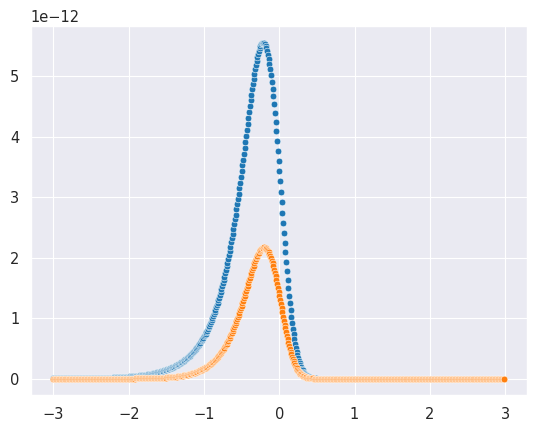

In [78]:
sns.scatterplot(x=theta,y=lh)
sns.scatterplot(x=theta,y=posterior)

Vemos que há um pico probabilidade em algum theta. Esta maneira de estimar a habilidade mais provável que gerou este padrão de resposta é chamado de "máxima verossimilhança". (A verossimilhança aqui é essencialmente o modelo para a probabilidade dos padrões de resposta, se considerar esta probabilidade como uma função do parâmetro theta e considerando os 45 parâmetros a, b e c como conhecidos e fixos).

Para fins didáticos, podemos mostrar como a probabilidade de acertar as questões evolui questão por questão. Na medida que mais informação entra (na forma de acertos e falhas de questões), o modelo "aprende" com cada vez mais precisão o que seria a habilidade theta associada a esta padrão de respostas.

In [19]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [32]:
def displaypadr(s):
    def check(s):
        if s: return '✔'
        else: return '✖'
    s = s.apply(check)
    s = ''.join(list(s.values))
    if len(s) > 20:
        return s[:20] + "\n" + s[20:]
    return s

padrs = load_acertos(2024,'LC',2)
for index,padr in padrs.iterrows():
    print(index,displaypadr(padr))

404239 ✖✖✔✔✖✔✖✔✔✔✔✔✔✔✖✖✔✖✔✖
✔✖✖✖✔✔✔✔✔✔✖✖✖✖✖✔✖✔✖✖✔✔✔
1568633 ✔✔✔✔✔✖✔✔✖✖✖✖✖✖✖✔✖✔✖✔
✖✖✖✔✖✖✖✔✖✔✖✖✖✖✖✖✖✖✖✖✔✔✔


In [83]:
# escolher um padrão de resposta
ano = 2014
area = 'LC'
pp,nota_inep = padrparams(ano,area,nota_inep=True,acertos=9)
print(nota_inep)

def viz_padr_prob(pp,until=None,posterior=False,returnfig=False):
    'Gráfico da verossimilhança em função de theta, dado parâmetros TRI e um padrão de resposta'
    
    fig = plt.figure()
    theta = np.arange(-4,4,0.01)
    if until:
        pp = pp[:until]
    padr = pp.iloc[:,-1]
    s = displaypadr(padr)
    lh = padr_prob(theta,pp,posterior=posterior)
    ax = sns.scatterplot(x=theta,y=lh)
    nota_ml = (-4+lh.argmax()*0.01)
    lhmax = lh[lh.argmax()]
    #print(lhmax,nota_ml)
    ax.axvline(x=nota_ml,ymin=0,ymax=1,ls='--',lw=2,c='orange')
    ax.set_title(f"Após {until} respostas ("+s+")",loc='left')
    ax.set_xlabel(r"$\theta$ (unidade de desvio padrão)")
    ax.set_ylabel(r"$P(y_i|\theta$)")
    #ax.set_yticks([])
    if returnfig:
        return fig
    
iw = widgets.BoundedIntText(
    value=2,
    min=1,
    max=50,
    step=1,
    description='Número de repostas:',
    disabled=False
)

interact(viz_padr_prob,pp=fixed(pp),until=iw,posterior=fixed(False));
#fig = viz_padr_prob(pp,1)
#fig.savefig('images/test.png',dpi=300)

              acertos  caderno  nota_inep
candidato                                
140007000692        9      205      401.9


interactive(children=(BoundedIntText(value=2, description='Número de repostas:', max=50, min=1), Checkbox(valu…

In [58]:
# para fazer um filminho...
acertos = 40
ano = 2023
area = 'MT'
pp,nota_inep = padrparams(ano,area,nota_inep=True,acertos=acertos)
for i in range(1,46):
    fig = viz_padr_prob(pp,i,returnfig=True)
    fig.savefig(f'images/tri/{acertos}/{area}-{ano}n{i}.png',dpi=300)
    plt.close(fig)

2014 / LC | 500.0 | 108.1 | 0.005


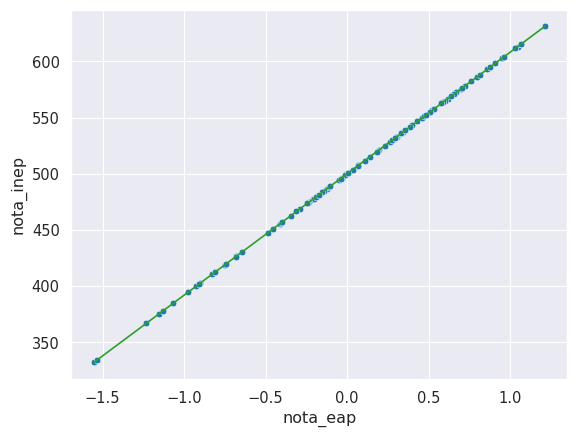

In [84]:
ano = 2014
area = 'LC'
theta = np.arange(-4,4,0.001)

d = {'acertos':[],'nota_inep':[],'nota_ml':[],'nota_eap':[]}
        
for i in range(100):
    pp,notas = padrparams(ano,area,1,nota_inep=True)
    nota, acertos = notas['nota_inep'].values[0], notas['acertos'].values[0]
    lh, posterior = padr_prob(theta,pp,posterior=True)
    nota_ml = (-4+lh.argmax()*0.001)
    nota_eap = np.average(theta, weights=posterior)
    d['acertos'].append(acertos)
    d['nota_inep'].append(nota)
    d['nota_ml'].append(nota_ml)
    d['nota_eap'].append(nota_eap)
df = pd.DataFrame(d)
res = scipy.stats.linregress(df['nota_eap'], df['nota_inep'])
sns.scatterplot(df,x='nota_eap',y='nota_inep')
sns.lineplot(x=df['nota_eap'],y=res.intercept + res.slope*df['nota_eap'],color='C2')
print(f"{ano} / {area} | {res.intercept:.1f} | {res.slope:.1f} | {res.stderr:.3f}")

✅ 2009, CN |	 501.1 |	 113.1 |	 0.003
✅ 2009, CH |	 501.5 |	 112.3 |	 0.004
✅ 2009, MT |	 500.0 |	 129.7 |	 0.004
✅ 2009, LC |	 500.0 |	 108.1 |	 0.004
✅ 2010, CN |	 501.1 |	 113.1 |	 0.004
✅ 2010, CH |	 501.5 |	 112.3 |	 0.004
✅ 2010, MT |	 500.0 |	 129.7 |	 0.004
✅ 2010, LC |	 500.0 |	 108.1 |	 0.004
✅ 2011, CN |	 501.1 |	 113.1 |	 0.004
❌ 2011, CH |	 549.6 |	 132.7 |	 6.607
✅ 2011, MT |	 500.0 |	 129.6 |	 0.004
✅ 2011, LC |	 500.0 |	 108.1 |	 0.004
✅ 2012, CN |	 501.2 |	 113.1 |	 0.005
✅ 2012, CH |	 501.5 |	 112.3 |	 0.004
✅ 2012, MT |	 500.0 |	 129.7 |	 0.003
✅ 2012, LC |	 500.0 |	 108.1 |	 0.004
✅ 2013, CN |	 501.1 |	 113.1 |	 0.005
✅ 2013, CH |	 501.5 |	 112.3 |	 0.004
❌ 2013, MT |	 515.5 |	 123.8 |	 3.041
✅ 2013, LC |	 500.0 |	 108.1 |	 0.004
✅ 2014, CN |	 501.1 |	 113.1 |	 0.004
✅ 2014, CH |	 501.5 |	 112.3 |	 0.005
✅ 2014, MT |	 500.0 |	 129.7 |	 0.004
✅ 2014, LC |	 500.0 |	 108.1 |	 0.005
✅ 2015, CN |	 501.1 |	 113.1 |	 0.005
✅ 2015, CH |	 501.5 |	 112.3 |	 0.005
✅ 2015, MT |

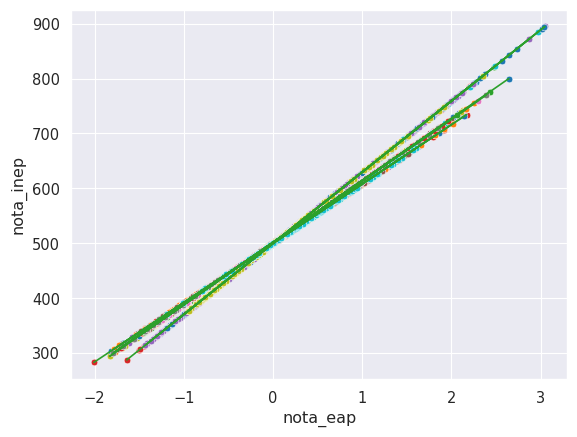

In [85]:
theta = np.arange(-4,4,0.001)

N = 100
results = pd.DataFrame(columns=['ano','area','slope','intercept','stderr','warning'])
for ano in range(2009,2025):
    for area in ['CN','CH','MT','LC']:
        d = {'acertos':[],'nota_inep':[],'nota_ml':[],'nota_eap':[]}
        
        for i in range(N):
            pp,notas = padrparams(ano,area,1,nota_inep=True)
            nota, acertos = notas['nota_inep'].values[0], notas['acertos'].values[0]
            lh, posterior = padr_prob(theta,pp,posterior=True)
            nota_ml = (-4+lh.argmax()*0.001)
            nota_eap = np.average(theta, weights=posterior)
            d['acertos'].append(acertos)
            d['nota_inep'].append(nota)
            d['nota_ml'].append(nota_ml)
            d['nota_eap'].append(nota_eap)
        notas = pd.DataFrame(d)
        
        res = scipy.stats.linregress(notas['nota_eap'], notas['nota_inep'])
        if res.stderr < 0.05:
            warning = '✅'
            sns.scatterplot(notas,x='nota_eap',y='nota_inep')
            sns.lineplot(x=notas['nota_eap'],y=res.intercept + res.slope*notas['nota_eap'],color='C2')
        else: 
            warning = '❌'
        results.loc[len(results)] = [ano,area,res.slope,res.intercept,res.stderr,warning]
        print(f"{warning} {ano}, {area} |\t {res.intercept:.1f} |\t {res.slope:.1f} |\t {res.stderr:.3f}")
results['ano'] = results['ano'].astype('int')    
results.to_csv(f'data/scorecal-python-{N}.csv',index=False)

In [86]:
results.sort_values('ano')

,ano,area,slope,intercept,stderr,warning
0,2009,CN,113.104131,501.140213,0.003487,✅
1,2009,CH,112.308916,501.482161,0.003633,✅
2,2009,MT,129.651542,500.011016,0.004317,✅
3,2009,LC,108.093521,499.974619,0.004154,✅
4,2010,CN,113.105945,501.139124,0.004244,✅
...,...,...,...,...,...,...
59,2023,LC,108.092820,499.974027,0.003942,✅
62,2024,MT,129.648812,500.011392,0.003724,✅
60,2024,CN,113.104277,501.143272,0.003967,✅
61,2024,CH,112.316910,501.489154,0.003592,✅


## Comparar com `mirt`
Vamos comparar o cálculo da nota com nosso método caseira com os cálculos dos professionais, ou seja, a biblioteca `mirt` do Chalmers

In [87]:
from util import scalecalparams,score_inep

In [114]:
ano,area = 2023,'CN'
pp, nota_inep = padrparams(ano,area,1,nota_inep=True)
alpha,beta = scalecalparams(area)
display(nota_inep)
padr = pd.DataFrame(pp.iloc[:,-1]).T
score_inep(padr,ano,area,enemscale=True)

,acertos,caderno,nota_inep
candidato,,,
210061325495,18,1223,622.0


,nota,se
210061325495,621.968539,24.679315


In [115]:
thetas = np.arange(-4,4,.001)
ll, posterior = padr_prob(thetas,pp,posterior=True)


In [116]:
nota_eap = np.average(thetas, weights=posterior)
nota_se = np.sqrt(np.average(thetas**2,weights=posterior)-nota_eap**2)
display(nota_eap*alpha + beta,nota_se*alpha)
nota_eap, nota_se

np.float64(621.9685392028507)

np.float64(24.679314603427187)

(np.float64(1.0682367100757397), np.float64(0.2181913447278458))

In [117]:
score_inep(padr,ano,area,enemscale=False)

,nota,se
210061325495,1.068237,0.218191
